#### 1. Import Necessary Packages and Data

In [6]:
# GENERAL
import pandas as pd                                    #Used to read data
import csv                                             #Used for read data
import numpy as np                                     #Used to compute Root Mean Square Error
from sklearn.model_selection import train_test_split   #Used to split the data into test and train sets 
from sklearn import metrics                            #Used to compute R^2, Mean Abs Error and Mean Square Error  
import matplotlib.pyplot as plt                        #Used to visualize data

# MODEL SPECIFIC
from sklearn.svm import SVR                            #Used to fit and predict a Support Vector Regression Model 

# DATA
inputData = pd.read_excel(r'/Users/emilyknight/Downloads/Volumetric_features.xlsx', engine='openpyxl') #Import data

inputData.head() #Print complete dataset to console

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


#### 2. Select and Split Input and Output Vectors

In [7]:
X = inputData.drop(columns=['S.No', 'Age', 'dataset']) #Input vector is the brain volume
y = inputData['Age'] #Output data is the age

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Split vectors, 20% will be used for testing 

#### 3. Instantiate and Fit Models

In [8]:
regr_rbf_kernel = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1) #SVR Model with Radial Base Function Kernel Function
print('done')

regr_rbf_kernel.fit(X_train, y_train) #Fit the Model given the Radial Base Function Kernel Function
print('done')

done
done


#### 4. Test and Quantify Model Performance

In [9]:
rbf_predictions = regr_rbf_kernel.predict(X_test) #Check the rbf model with the test data 


print('\033[1m' + 'RBF Model' + '\033[0m')
print('r^2 Value:', metrics.r2_score(y_test, rbf_predictions))
print('Mean Absolute Error (Years):', metrics.mean_absolute_error(y_test, rbf_predictions))
print('Mean Square Error:', metrics.mean_squared_error(y_test, rbf_predictions))
print('Root Mean Sqaure Error (Years):', np.sqrt(metrics.mean_squared_error(y_test, rbf_predictions)))

RBF Model
r^2 Value: -4.057047864303165e-05
Mean Absolute Error (Years): 17.622093107837646
Mean Square Error: 411.4975676745045
Root Mean Sqaure Error (Years): 20.28540282258414


#### 5. Visualize Data

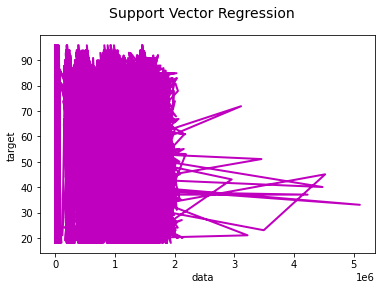

In [16]:
lw = 2

svrs = [regr_rbf_kernel]
kernel_label = ["RBF"]
model_color = ["m"]

fig, axes = plt.subplots()
        
axes.plot(
    X,
    svr.fit(X, y).predict(X),
    color="m",
    lw=2,
    label="RBF Model")
          

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()